In [1]:
import sys
print (sys.version)

sys.path.append('../scripts')
#sys.path.append('/home/bxie/PycharmProjects/opioid/Contact_frequency/GPCR_PDBs/scripts')

from run import *
from _heatmap import *
import matplotlib
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
font = {'size': 10}
matplotlib.rc('font', **font)
convert_index = False


np.set_printoptions(threshold=np.inf)

%load_ext autoreload
%autoreload 2

3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]


In [2]:
##### See "In [11]", Combine two trajectories information
##### PROBLEM is in the format mismatch between ylabels and union_ylables
##### ylabels and xlabels: format %3d
##### union_labels: format free

#### line 90 in wrap_toolkit.py (adding %3d) fix this problem in expanded_function
#### now check the output, the problem is fixed for this function!!

#### Now, error in reordered function

In [3]:
pwd

'/home/leila/repositories/pia-x/coupler/union_traj_freq_example'

### Analyze the 1st traj

In [4]:
matrix, xlabels, ylabels, x_axis_label, y_axis_label = master('traj_frequency', 'mdmb', 'mdmb_parameters.ini',convert_index)

#print(matrix)
print(xlabels)
print('')
print(ylabels)

print(len(xlabels))
print(len(ylabels))

mdmb_parameters.ini
['mdmb']
['149 C', '150 R', '152 S', '153 Y', '213 D', '214 R', '217 S', '218 I', '220 R', '221 P', '222 L', '223 A', '224 Y', '225 K', '226 R', '230 R', '294 Y', '297 I', '300 K', '301 A', '304 H', '307 R', '308 M', '311 R', '312 G', '313 T', '335 A', '336 R', '337 M', '340 R', '341 L', '344 T', '345 L', '348 I', '396 I', '397 Y', '400 R', '401 S', '402 K', '403 D', '405 R']

[' 24 R', ' 27 G', ' 28 E', ' 31 A', ' 32 R', ' 33 E', ' 34 V', '193 D', '194 L', '195 H', '304 Q', '314 K', '315 D', '316 T', '318 E', '320 Y', '321 T', '322 H', '323 F', '324 T', '330 K', '333 Q', '334 F', '336 F', '337 D', '338 A', '340 T', '341 D', '343 I', '344 I', '345 K', '347 N', '348 L', '349 K', '350 D', '351 C', '352 G', '353 L', '354 F']
41
39


Text(0.5, 0, 'G protein residues')

<Figure size 432x288 with 0 Axes>

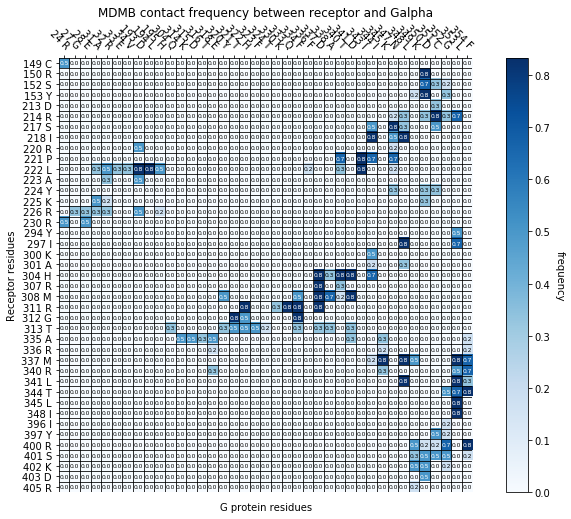

In [5]:
plt.clf()
plt.figure(figsize=(12,8))
ax = plt.subplot(1, 1, 1)
im,cbar = heatmap(matrix, xlabels, ylabels, ax=ax,cmap="Blues", cbarlabel="frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=6)
plt.title('MDMB contact frequency between receptor and Galpha')
plt.ylabel(y_axis_label)
plt.xlabel(x_axis_label)


### Analyze the 2nd traj

In [6]:
matrix2, xlabels2, ylabels2, x_axis_label, y_axis_label = master('traj_frequency', 'cp55', 'cp55_parameters.ini',convert_index)

#print(matrix2)
print(xlabels2)
print('')
print(ylabels2)

print(len(xlabels2))
print(len(ylabels2))

cp55_parameters.ini
['mdmb', 'cp55']
['150 R', '152 S', '153 Y', '213 D', '214 R', '217 S', '218 I', '221 P', '222 L', '223 A', '224 Y', '225 K', '226 R', '229 T', '232 K', '294 Y', '297 I', '300 K', '301 A', '304 H', '307 R', '308 M', '311 R', '312 G', '313 T', '337 M', '338 D', '340 R', '341 L', '344 T', '345 L', '348 I', '396 I', '397 Y', '399 L', '400 R', '401 S', '402 K', '403 D', '405 R']

[' 24 R', ' 25 E', ' 28 E', ' 30 A', ' 31 A', ' 32 R', ' 33 E', ' 34 V', '192 K', '193 D', '194 L', '195 H', '219 T', '318 E', '320 Y', '322 H', '330 K', '333 Q', '334 F', '336 F', '337 D', '338 A', '339 V', '340 T', '341 D', '343 I', '344 I', '345 K', '346 N', '347 N', '348 L', '349 K', '350 D', '351 C', '352 G', '353 L', '354 F']
40
37


Text(0.5, 0, 'G protein residues')

<Figure size 432x288 with 0 Axes>

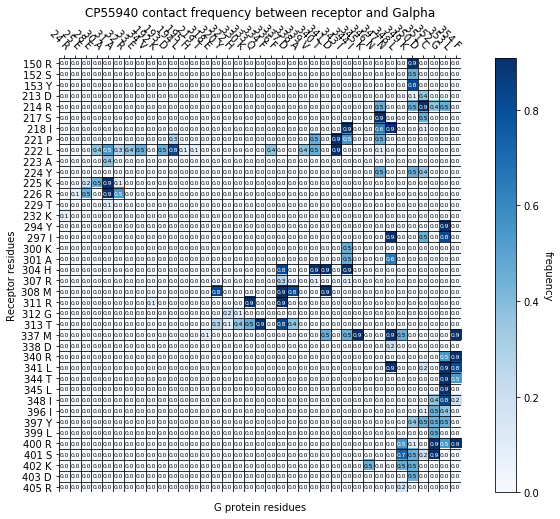

In [7]:
plt.clf()
plt.figure(figsize=(12,8))
ax = plt.subplot(1, 1, 1)
im,cbar = heatmap(matrix2, xlabels2, ylabels2, ax=ax,cmap="Blues", cbarlabel="frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=6)
plt.title('CP55940 contact frequency between receptor and Galpha')
plt.ylabel(y_axis_label)
plt.xlabel(x_axis_label)


### Combine two trajs information together

In [10]:
full_xlabels = make_union_list(xlabels, xlabels2)
full_ylabels = make_union_list(ylabels, ylabels2)

print('X - Receptor Residues')
print(full_xlabels)
print('')
print('number of (Full) Receptor residues is:', len(full_xlabels))

print('')
print('')

print('Y - Galpha Residues')
print(full_ylabels)
print('')
print('number of (Full) Galpha residues is:', len(full_ylabels))
print('')

print('mdmb - Galpha', ylabels)
print('')

expanded_sample1_matrix = expanded_matrix(matrix, full_xlabels, full_ylabels, xlabels, ylabels)
print('')
expanded_sample2_matrix = expanded_matrix(matrix2, full_xlabels, full_ylabels, xlabels2, ylabels2)

print (expanded_sample1_matrix)
print('END of expanded matrix - SAMPLE 1')
print('')

### expanded_matrix does not match individual matrix. There is a shift in contacts

non_rep_sample1_matrix, filtered_xlabel, filtered_ylabel = filter_duplicate_matrix(expanded_sample1_matrix,full_xlabels,full_ylabels)
non_rep_sample2_matrix, filtered_xlabel, filtered_ylabel = filter_duplicate_matrix(expanded_sample2_matrix,full_xlabels,full_ylabels)

reordered_sample1_matrix, reordered_xlabel, reordered_ylabel = reorder_matrix(non_rep_sample1_matrix, filtered_xlabel, filtered_ylabel)
reordered_sample2_matrix, reordered_xlabel, reordered_ylabel = reorder_matrix(non_rep_sample2_matrix, filtered_xlabel, filtered_ylabel)

#print (reordered_sample1_matrix)
#print ('END of reordered matrix - SAMPLE 1')

########################################################################################################################################

plt.clf()
plt.figure(figsize=(20,7))
ax = plt.subplot(1, 2, 1)
im,cbar = heatmap(reordered_sample1_matrix, reordered_xlabel, reordered_ylabel, ax=ax,cmap="Blues", cbarlabel="frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=6)
plt.title('MDMB contact frequency between receptor and Galpha')
plt.ylabel(y_axis_label)
plt.xlabel(x_axis_label)

########################################################################################################################################

ax = plt.subplot(1, 2, 2)
im,cbar = heatmap(reordered_sample2_matrix, reordered_xlabel, reordered_ylabel, ax=ax,cmap="Blues", cbarlabel="frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=6)
plt.title('CP55940 contact frequency between receptor and Galpha')
plt.ylabel(y_axis_label)
plt.xlabel(x_axis_label)
plt.savefig('MDMB_CP55940.png')

label_list2 ['150 R', '152 S', '153 Y', '213 D', '214 R', '217 S', '218 I', '221 P', '222 L', '223 A', '224 Y', '225 K', '226 R', '229 T', '232 K', '294 Y', '297 I', '300 K', '301 A', '304 H', '307 R', '308 M', '311 R', '312 G', '313 T', '337 M', '338 D', '340 R', '341 L', '344 T', '345 L', '348 I', '396 I', '397 Y', '399 L', '400 R', '401 S', '402 K', '403 D', '405 R']
Function: make_union_list

['149 C', '150 R', '152 S', '153 Y', '213 D', '214 R', '217 S', '218 I', '220 R', '221 P', '222 L', '223 A', '224 Y', '225 K', '226 R', '229 T', '230 R', '232 K', '294 Y', '297 I', '300 K', '301 A', '304 H', '307 R', '308 M', '311 R', '312 G', '313 T', '335 A', '336 R', '337 M', '338 D', '340 R', '341 L', '344 T', '345 L', '348 I', '396 I', '397 Y', '399 L', '400 R', '401 S', '402 K', '403 D', '405 R'] sorted


label_list2 [' 24 R', ' 25 E', ' 28 E', ' 30 A', ' 31 A', ' 32 R', ' 33 E', ' 34 V', '192 K', '193 D', '194 L', '195 H', '219 T', '318 E', '320 Y', '322 H', '330 K', '333 Q', '334 F', '

IndexError: index 36 is out of bounds for axis 0 with size 36

### Calculate the difference between two trajs

In [ ]:
matrix, xlabel, ylabel = filter_empty_matrix(reordered_sample1_matrix-reordered_sample2_matrix, reordered_xlabel, reordered_ylabel)
translate_xlabel, translate_ylabel = add_labels('cp55', 'cp55_parameters.ini', xlabel, ylabel)
plt.clf()
plt.figure(figsize=(10,8))
ax = plt.subplot(1, 1, 1)
im,cbar = heatmap(matrix, translate_xlabel, translate_ylabel,ax=ax,cmap="bwr",vmin=-1,vmax=1,cbarlabel="frequency")
#im,cbar = heatmap(reordered_sample1_matrix-reordered_sample2_matrix, reordered_xlabel, reordered_ylabel, ax=ax,cmap="bwr",vmin=-1,vmax=1,cbarlabel="frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=6)
plt.title('(MDMB-CP55940) Difference contact frequency between receptor and Galpha')
plt.ylabel(y_axis_label)
plt.xlabel(x_axis_label)
plt.savefig('MDMB_CP55940_diff.png')

In [ ]:
threshold = 0.1
different_interaction_pairs=find_different_pair(matrix,xlabel, ylabel,threshold)

if not os.path.isdir('cont_freq_resids_list'):
    os.system('mkdir cont_freq_resids_list')
    
write_down_difference(different_interaction_pairs, 'cont_freq_resids_list/diff_between_MDMB_vs_CP_Ga_matrix.py')